<a href="https://colab.research.google.com/github/Pramod077/Deep_Learning/blob/main/Final_Infill_style_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [ ]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [ ]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [ ]:
content_image = load_image('/content/drive/MyDrive/data/INFILL_IMAGE.jpg')
style_image = load_image('/content/drive/MyDrive/data/INFILL_STYLE_IMAGE.jpg')

In [ ]:
content_image.shape

TensorShape([1, 361, 396, 3])

In [ ]:
style_image.shape

TensorShape([1, 360, 390, 3])

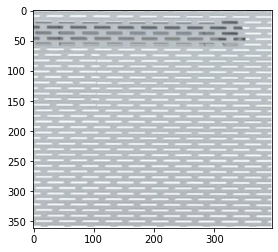

In [ ]:
plt.imshow(np.squeeze(content_image))
plt.show()

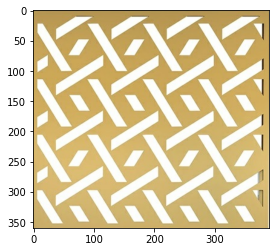

In [ ]:
plt.imshow(np.squeeze(style_image))
plt.show()

In [ ]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

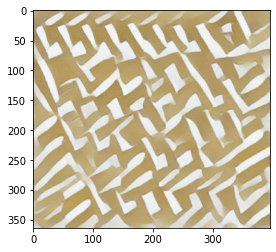

In [ ]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [ ]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True